DATA PROCESSING:

In [2]:
import pandas as pd
import glob
import numpy as np 
import scipy as sp
import matplotlib.pyplot as plt
from math import sqrt
import math as m

% matplotlib inline

In [3]:
from datetime import datetime 
from pandas import ExcelWriter
from pandas import DataFrame as d
from pandas import Series as s

In [4]:
from sklearn import preprocessing
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

In [5]:
import seaborn as sns
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

In [7]:
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import LinearSVC


In [7]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

#from sklearn.svm import SVC
#from sklearn.naive_bayes import GaussianNB


In [9]:
from sklearn.tree import export_graphviz

In [10]:
sns.set(color_codes = True)
#plt.style.use('ggplot')


In [11]:
# Access all file.xlsx in folder states and create a loop to select the state:
# path = "../AQI Prediction/States/*.xlsx"
# for f in glob.glob(path):
#    pd.read_excel(f)

In [13]:
data = pd.read_csv('Kerala.csv')
data.columns

Index([u'Date', u'State', u'City', u'Station_Name', u'Amb_Temp', u'Bar_Press',
       u'RH', u'WS', u'SO2', u'NO2', u'PM10', u'PM2_5'],
      dtype='object')

In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1065 entries, 0 to 1064
Data columns (total 12 columns):
Date            1065 non-null object
State           1065 non-null object
City            1065 non-null object
Station_Name    1065 non-null object
Amb_Temp        849 non-null float64
Bar_Press       0 non-null float64
RH              849 non-null float64
WS              849 non-null float64
SO2             849 non-null float64
NO2             849 non-null float64
PM10            849 non-null float64
PM2_5           845 non-null float64
dtypes: float64(8), object(4)
memory usage: 99.9+ KB


In [241]:
data.isnull().sum()

Date               0
State              0
City               0
Station_Name       0
Amb_Temp         216
Bar_Press       1065
RH               216
WS               216
SO2              216
NO2              216
PM10             216
PM2_5            220
dtype: int64

In [242]:
data.columns

Index(['Date', 'State', 'City', 'Station_Name', 'Amb_Temp', 'Bar_Press', 'RH',
       'WS', 'SO2', 'NO2', 'PM10', 'PM2_5'],
      dtype='object')

In [243]:
data.shape

(1065, 12)

In [15]:
data = data.drop(['Bar_Press'],axis = 1)

In [16]:
data.describe()

,Amb_Temp,RH,WS,SO2,NO2,PM10,PM2_5
count,849.000000,849.000000,849.000000,849.000000,849.000000,849.000000,845.000000
mean,28.295819,76.863887,1.693157,5.286490,10.188905,55.275395,30.979728
std,1.155514,5.310108,0.506183,2.033835,4.257202,25.478966,20.293860
min,24.220000,59.540000,0.300000,1.280000,1.580000,10.000000,3.970000
25%,27.670000,72.880000,1.350000,4.010000,6.570000,34.780000,14.960000
50%,28.400000,77.510000,1.610000,4.930000,9.740000,48.690000,23.670000
75%,29.050000,80.740000,1.970000,6.060000,13.340000,72.710000,43.300000
max,31.570000,89.400000,3.800000,19.830000,21.660000,126.540000,94.020000


In [246]:
#data = data.replace(-6.46,np.nan)
#data = data.replace(-31.54,np.nan)
#data = data.replace(-0.42,np.nan)
#data.describe()

In [247]:
data['Date']=pd.to_datetime(data['Date'])
data.index = data['Date']

In [248]:
ndata = data.interpolate(method = 'time')
ndata = ndata.fillna(method = 'pad')
ndata.isnull().sum()

Date            0
State           0
City            0
Station_Name    0
Amb_Temp        2
RH              2
WS              2
SO2             2
NO2             2
PM10            2
PM2_5           2
dtype: int64

In [249]:
ndata = ndata.fillna(method = 'bfill')
ndata.isnull().sum()

Date            0
State           0
City            0
Station_Name    0
Amb_Temp        0
RH              0
WS              0
SO2             0
NO2             0
PM10            0
PM2_5           0
dtype: int64

In [250]:
ndata.describe()

,Amb_Temp,RH,WS,SO2,NO2,PM10,PM2_5
count,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000,1065.000000
mean,28.232487,77.067406,1.781312,5.142601,9.720191,52.223811,28.249412
std,1.123233,5.000703,0.506647,1.901183,4.089870,24.314449,19.408004
min,24.220000,59.540000,0.300000,1.280000,1.580000,10.000000,3.970000
25%,27.600000,73.640000,1.410000,3.960000,6.360000,34.780000,14.370000
50%,28.290000,77.400000,1.720000,4.830000,9.084972,44.780000,19.806333
75%,28.914754,80.780000,2.190000,5.800000,12.538634,67.960000,38.040000
max,31.570000,89.400000,3.800000,19.830000,21.660000,126.540000,94.020000


In [251]:
ndata.dtypes

Date            datetime64[ns]
State                   object
City                    object
Station_Name            object
Amb_Temp               float64
RH                     float64
WS                     float64
SO2                    float64
NO2                    float64
PM10                   float64
PM2_5                  float64
dtype: object

In [252]:
ndata['Amb_Temp']=ndata['Amb_Temp'].astype(float)
ndata.dtypes

Date            datetime64[ns]
State                   object
City                    object
Station_Name            object
Amb_Temp               float64
RH                     float64
WS                     float64
SO2                    float64
NO2                    float64
PM10                   float64
PM2_5                  float64
dtype: object

In [253]:
ndata.isnull().sum()

Date            0
State           0
City            0
Station_Name    0
Amb_Temp        0
RH              0
WS              0
SO2             0
NO2             0
PM10            0
PM2_5           0
dtype: int64

In [50]:
ndata = ndata.fillna(method = 'bfill')
ndata.isnull().sum()

Date            0
State           0
City            0
Station_Name    0
Amb_Temp        0
RH              0
WS              0
SO2             0
NO2             0
PM10            0
PM2_5           0
dtype: int64

In [51]:
ndata.to_csv('fillDelhi.csv')

DATA ENCODING

In [52]:
obj_ndata = ndata.select_dtypes(include=['object']).copy()
obj_ndata.head(3)
obj_ndata.dtypes


State           object
City            object
Station_Name    object
dtype: object

In [53]:
obj_ndata["State"] = obj_ndata["State"].astype('category')
obj_ndata["City"] = obj_ndata["City"].astype('category')
obj_ndata["Station_Name"] = obj_ndata["Station_Name"].astype('category')
obj_ndata.dtypes


State           category
City            category
Station_Name    category
dtype: object

In [54]:
#obj_ndata["State_cat"] = obj_ndata["State"].cat.codes
#obj_ndata["City_cat"] = obj_ndata["City"].cat.codes
#obj_ndata["Station_Name_cat"] = obj_ndata["Station_Name"].cat.codes
#obj_ndata.head()
#obj_ndata.tail()

In [255]:
Encode = pd.get_dummies(obj_ndata,columns = ["State","City","Station_Name"],prefix = ['State_','City_','SName_'])
Encode

,State__Kerala,City__Thiruvananthapuram,SName__Plammoodu
Date,,,
2015-02-07,1,1,1
2015-03-07,1,1,1
2015-04-07,1,1,1
2015-05-07,1,1,1
2015-06-07,1,1,1
2015-07-07,1,1,1
2015-08-07,1,1,1
2015-07-15,1,1,1
2015-07-16,1,1,1


In [97]:
OB = ndata.iloc[:,:4]
VA = ndata.iloc[:,4:]
Data = pd.concat([OB,Encode,VA], axis = 1)
#Data.head(10)
print(VA)

             Amb_Temp         RH        WS        SO2        NO2        PM10  \
Date                                                                           
2015-02-07  27.420000  85.870000  1.240000   3.620000   5.100000   23.040000   
2015-03-07  27.420000  85.870000  1.240000   3.620000   5.100000   23.040000   
2015-04-07  27.420000  85.870000  1.240000   3.620000   5.100000   23.040000   
2015-05-07  27.390000  88.240000  1.160000   4.050000   6.550000   22.020000   
2015-06-07  27.490000  80.860000  1.750000   4.680000   6.980000   32.690000   
2015-07-07  27.190000  78.990000  2.250000   3.690000   5.010000   38.000000   
2015-08-07  26.190000  76.600000  1.730000   3.310000   5.870000   37.020000   
2015-07-15  26.990000  76.320000  2.160000   3.910000   5.900000   49.300000   
2015-07-16  28.260000  83.460000  1.930000   4.860000   9.040000   49.530000   
2015-07-17  27.040000  84.240000  1.600000   3.460000   7.990000   35.780000   
2015-07-18  27.900000  79.510000  1.4900

SCALLING:

  1) NORMALIZATION:

In [100]:
VA.isnull().sum()
Target = ndata.iloc[:,-4:]
#VA.columns

In [101]:
V_Col = ['Amb_Temp','RH','WS']
normalize =d()
ninverse = d()
for c in V_Col:
    values = VA[c].values
    values = values.reshape((len(values), 1))
    scaler = MinMaxScaler(feature_range=(0, 1))
    scaler = scaler.fit(values)
    normalized = scaler.transform(values)
    norm = d(normalized)
    normalize = pd.concat([normalize,norm],axis = 1)
    inversed = scaler.inverse_transform(normalized)
    inorm = d(inversed)
    ninverse = pd.concat([ninverse,inorm],axis = 1)

normalize.index = ndata['Date']
Normalised_dataX = pd.concat([Encode,normalize],axis = 1, join_axes = [Encode.index])
ncol = ['State__Kerala', 'City__Thiruvananthapuram', 'SName__Plammoodu','Amb_Temp','RH','WS']
Normalised_dataX.columns = ncol
Normalised_dataX


,State__Kerala,City__Thiruvananthapuram,SName__Plammoodu,Amb_Temp,RH,WS
Date,,,,,,
2015-02-07,1,1,1,0.435374,0.881782,0.268571
2015-03-07,1,1,1,0.435374,0.881782,0.268571
2015-04-07,1,1,1,0.435374,0.881782,0.268571
2015-05-07,1,1,1,0.431293,0.961152,0.245714
2015-06-07,1,1,1,0.444898,0.713999,0.414286
2015-07-07,1,1,1,0.404082,0.651373,0.557143
2015-08-07,1,1,1,0.268027,0.571333,0.408571
2015-07-15,1,1,1,0.376871,0.561956,0.531429
2015-07-16,1,1,1,0.549660,0.801072,0.465714


2) STANDARDIZATION:

In [191]:
V_Col = ['Amb_Temp','RH','WS']
standardize = d()
sinverse = d()

for c in V_Col:
    values = VA[c].values
    values = values.reshape((len(values), 1))
    scaler = StandardScaler()
    scaler = scaler.fit(values)
    normalized1 = scaler.transform(values)
    norm1 = pd.DataFrame(normalized1)
    standardize = pd.concat([standardize,norm1],axis = 1)
    inversed = scaler.inverse_transform(normalized1)
    istand = d(inversed)
    sinverse = pd.concat([sinverse,],axis = 1)
    
standardize.index = ndata['Date']
Standardized_dataX = pd.concat([Encode,standardize],axis = 1,join_axes = [Encode.index])
Standardized_dataX.columns = ncol

#Standardized_dataX

In [103]:
"""
Note: Standaradized_dataX,Normalized_dataX are X(Data)
      Target = Y(Data)
"""        

'\nNote: Standaradized_dataX,Normalized_dataX are X(Data)\n      Target = Y(Data)\n'

DATA ANALYSIS

In [105]:
ndata

In [106]:
ndata.corr()

,Amb_Temp,RH,WS,SO2,NO2,PM10,PM2_5
Amb_Temp,1.000000,-0.169945,-0.106464,0.193335,0.296935,0.108884,0.190923
RH,-0.169945,1.000000,0.050902,-0.438879,-0.408185,-0.677979,-0.588962
WS,-0.106464,0.050902,1.000000,-0.206390,-0.485968,-0.350855,-0.473206
SO2,0.193335,-0.438879,-0.206390,1.000000,0.522701,0.311384,0.254173
NO2,0.296935,-0.408185,-0.485968,0.522701,1.000000,0.535525,0.523907
PM10,0.108884,-0.677979,-0.350855,0.311384,0.535525,1.000000,0.905892
PM2_5,0.190923,-0.588962,-0.473206,0.254173,0.523907,0.905892,1.000000


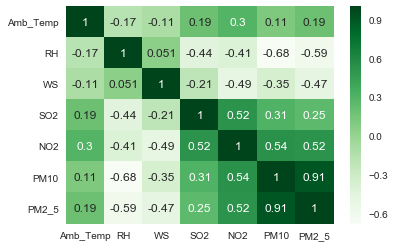

In [107]:
sns.heatmap(ndata.corr(),xticklabels = ndata.corr().columns,yticklabels = ndata.corr().columns,cmap = 'Greens',annot = True)

In [108]:
ndata.columns

Index(['Date', 'State', 'City', 'Station_Name', 'Amb_Temp', 'RH', 'WS', 'SO2',
       'NO2', 'PM10', 'PM2_5'],
      dtype='object')

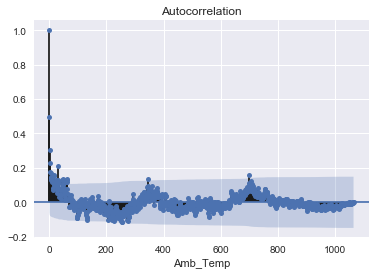

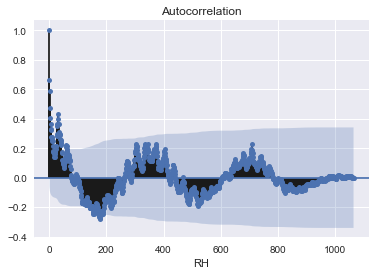

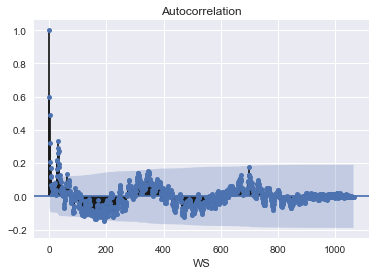

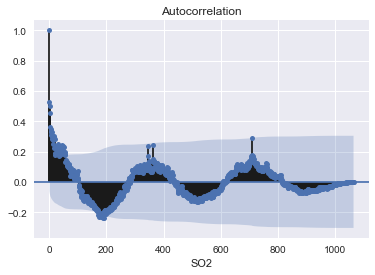

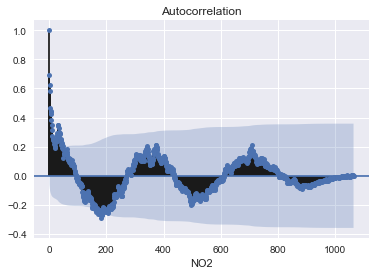

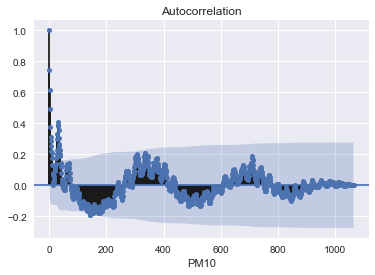

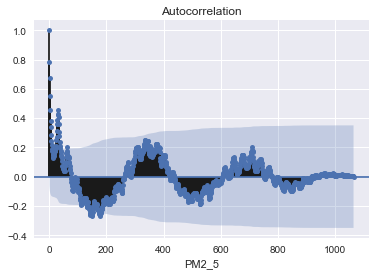

In [109]:
C_list = 'Amb_Temp RH WS SO2 NO2 PM10 PM2_5'
for c  in C_list.split():
    Comp = ndata[c]
    plot_acf(Comp, ax = plt.figure().add_subplot(111))
    plt.xlabel(c)
plt.show()

<Figure size 432x288 with 0 Axes>

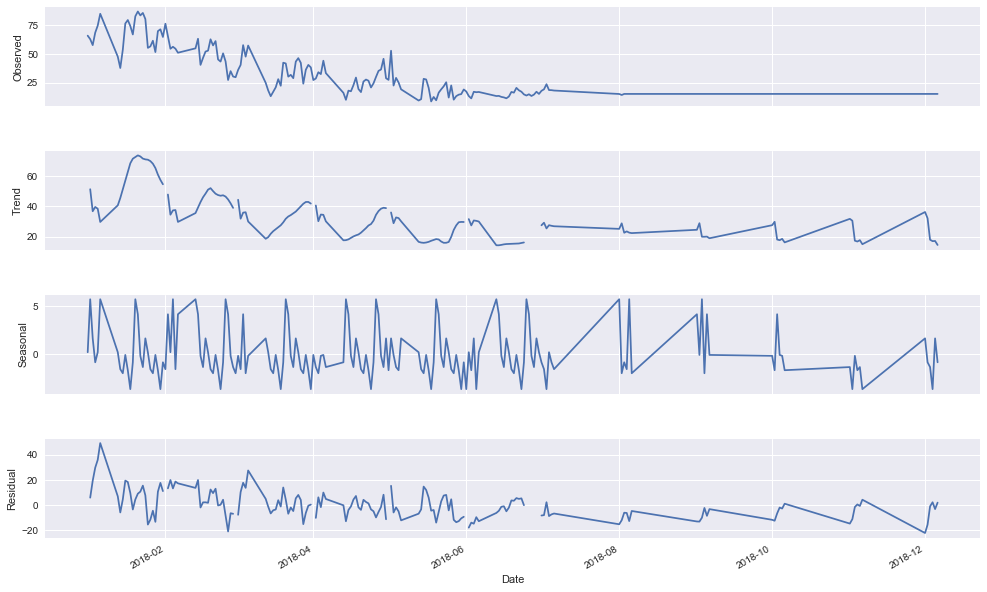

In [110]:
decomposition = seasonal_decompose(ndata['PM2_5']['2018'], freq=12)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 10)

<Figure size 432x288 with 0 Axes>

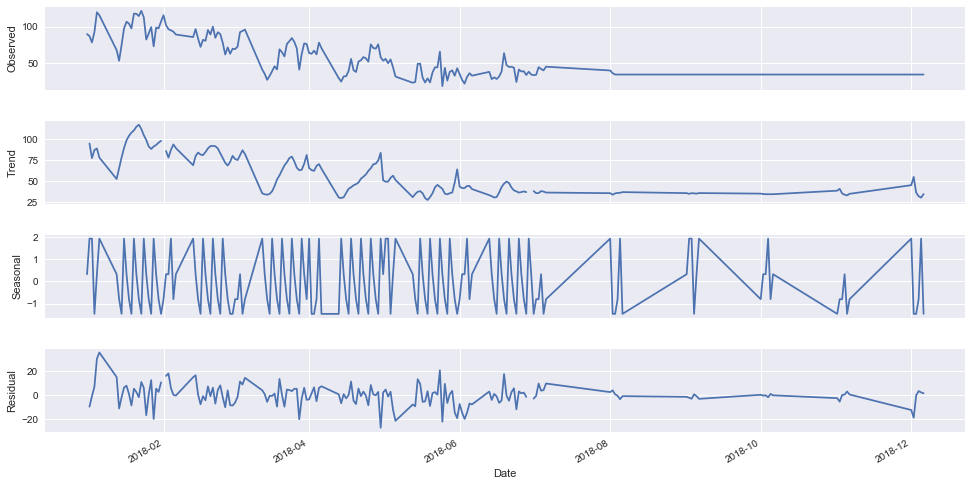

In [111]:
decomposition = seasonal_decompose(ndata['PM10']['2018'], freq=4)  
fig = plt.figure()  
fig = decomposition.plot()  
fig.set_size_inches(15, 8)

In [112]:
C_List = "Amb_Temp RH WS SO2 NO2 PM10 PM2_5"
for c  in C_List.split():  
    series = ndata[c]
    X = series.values
    result = adfuller(X)
    print('ADF Result for: ',c)
    print('\n')
    print('\t','ADF Statistic: %f' % result[0])
    print('\t','p-value: %f' % result[1])
    print('\t','Critical Values:')
    for key, value in result[4].items():
        print('\t','\t%s: %.3f' % (key, value))
    print('\n')

ADF Result for:  Amb_Temp


	 ADF Statistic: -5.177800
	 p-value: 0.000010
	 Critical Values:
	 	1%: -3.437
	 	5%: -2.864
	 	10%: -2.568


ADF Result for:  RH


	 ADF Statistic: -4.030253
	 p-value: 0.001260
	 Critical Values:
	 	1%: -3.437
	 	5%: -2.864
	 	10%: -2.568


ADF Result for:  WS


	 ADF Statistic: -6.447785
	 p-value: 0.000000
	 Critical Values:
	 	1%: -3.437
	 	5%: -2.864
	 	10%: -2.568


ADF Result for:  SO2


	 ADF Statistic: -4.108728
	 p-value: 0.000937
	 Critical Values:
	 	1%: -3.437
	 	5%: -2.864
	 	10%: -2.568


ADF Result for:  NO2


	 ADF Statistic: -5.884025
	 p-value: 0.000000
	 Critical Values:
	 	1%: -3.437
	 	5%: -2.864
	 	10%: -2.568


ADF Result for:  PM10


	 ADF Statistic: -7.929357
	 p-value: 0.000000
	 Critical Values:
	 	1%: -3.437
	 	5%: -2.864
	 	10%: -2.568


ADF Result for:  PM2_5


	 ADF Statistic: -9.185765
	 p-value: 0.000000
	 Critical Values:
	 	1%: -3.437
	 	5%: -2.864
	 	10%: -2.568




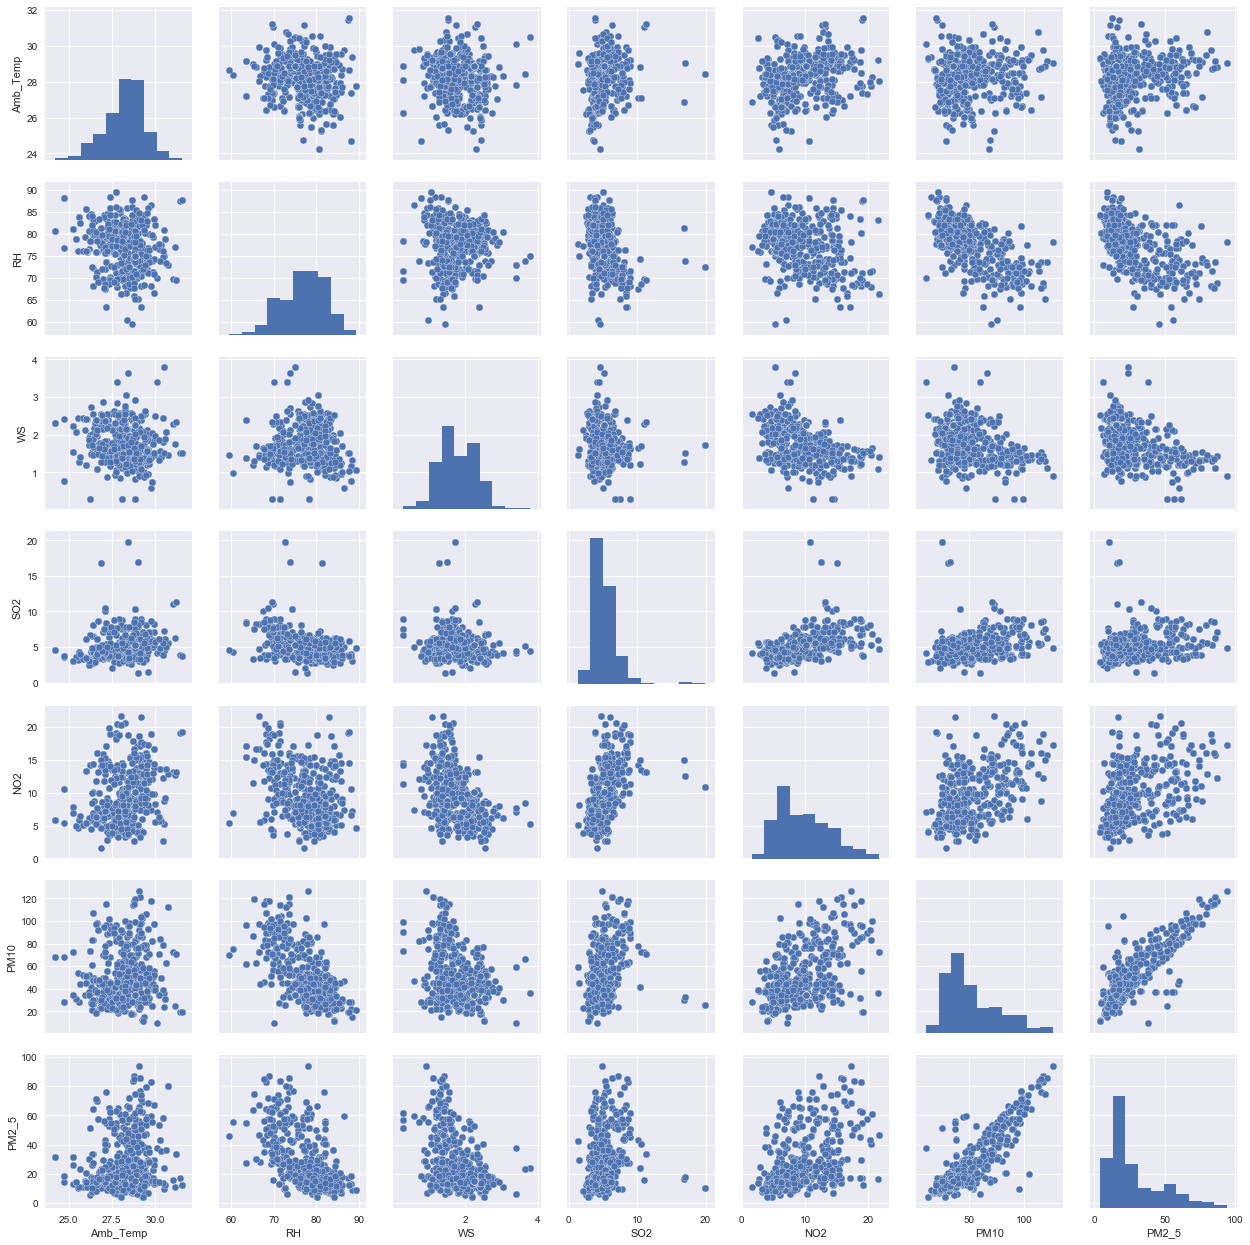

In [113]:
sns.pairplot(ndata)

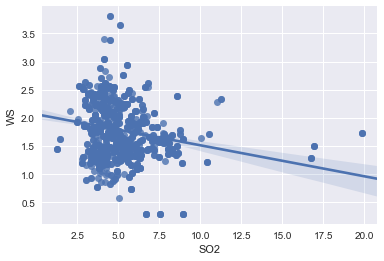

In [114]:
sns.regplot(x = "SO2",y = "WS",data = ndata)

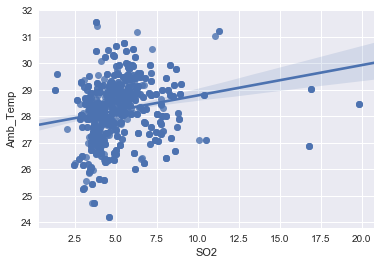

In [115]:
sns.regplot(x = "SO2",y = "Amb_Temp",data = ndata)

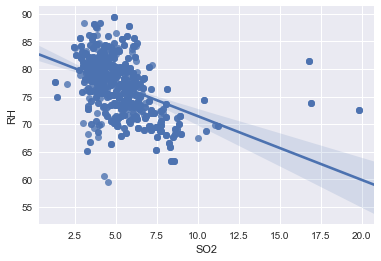

In [116]:
sns.regplot(x = "SO2",y = "RH",data = ndata)

In [117]:
Target

,SO2,NO2,PM10,PM2_5
Date,,,,
2015-02-07,3.620000,5.100000,23.040000,10.480000
2015-03-07,3.620000,5.100000,23.040000,10.480000
2015-04-07,3.620000,5.100000,23.040000,10.480000
2015-05-07,4.050000,6.550000,22.020000,13.160000
2015-06-07,4.680000,6.980000,32.690000,14.750000
2015-07-07,3.690000,5.010000,38.000000,15.500000
2015-08-07,3.310000,5.870000,37.020000,14.750000
2015-07-15,3.910000,5.900000,49.300000,15.240000
2015-07-16,4.860000,9.040000,49.530000,20.490000


In [122]:
y_so2 = Target['SO2'].round()
y_no2 = Target['NO2'].round()
y_pm2 = Target['PM2_5'].round()
y_pm10 = Target['PM10'].round()

In [123]:
X_s = Standardized_dataX
X_n = Normalised_dataX

LR: 0.047613 (0.039003)
LDA: 0.082746 (0.036133)
CART: 0.753149 (0.053462)


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\di

LSVM: 0.063067 (0.041971)


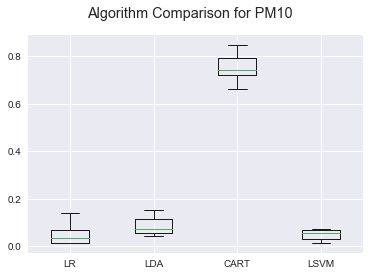

In [224]:
seed = 7
models = []
models.append(('LR', LogisticRegression()))        # Gives Error
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeRegressor()))  # GIves Error   
models.append(('LSVM', LinearSVC()))



Xs_train, Xs_test, ys_train, ys_test = train_test_split(X_s, y_pm10, test_size=0.33, random_state=42)
Xn_train, Xn_test, yn_train, yn_test = train_test_split(X_n, y_pm10, test_size=0.33, random_state=42)
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, Xn_train, yn_train.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

    
    
fig = plt.figure()
fig.suptitle('Algorithm Comparison for PM10')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [143]:
tree = DecisionTreeRegressor()
tree.fit(Xs_train,ys_train)
print("Accuracy on Training Set: {:.3f}".format(tree.score(Xs_train,ys_train)))
print("Accuracy on Test Set: {:.3f}".format(tree.score(Xs_test,ys_test)))

Accuracy on Training Set: 1.000
Accuracy on Test Set: 0.875


In [144]:
tree = DecisionTreeRegressor(max_depth =4 ,random_state = 0) # Prevent Over Fitting
tree.fit(Xs_train,ys_train)
print("Accuracy on Training Set: {:.3f}".format(tree.score(Xs_train,ys_train)))
print("Accuracy on Test Set: {:.3f}".format(tree.score(Xs_test,ys_test)))

Accuracy on Training Set: 0.723
Accuracy on Test Set: 0.695


In [204]:
print(len(tree.predict(Xs_test)))

352


In [205]:
print(len(ys_test))

352


In [149]:
export_graphviz(tree, out_file="tree.dot", impurity = False, filled = True)

In [150]:
print("Feature Importance :\n{}".format(tree.feature_importances_))

Feature Importance :
[ 0.          0.          0.          0.03689233  0.74533274  0.21777493]


In [156]:
prediction_set = d({ 'State' : ["Kerala","Kerala","Kerala"] ,
                    'City': ["Thiruvananthapuram","Thiruvananthapuram","Thiruvananthapuram"],
                    'Station_Name':["Plammoodu","Plammoodu","Plammoodu"],'Amb_Temp':[27.42,26.4,28],'RH':[85.87,76,77.41],'WS':[1.24,2.16,3.39]})
prediction_set 

,State,City,Station_Name,Amb_Temp,RH,WS
0,Kerala,Thiruvananthapuram,Plammoodu,27.42,85.87,1.24
1,Kerala,Thiruvananthapuram,Plammoodu,26.40,76.00,2.16
2,Kerala,Thiruvananthapuram,Plammoodu,28.00,77.41,3.39


In [186]:
E = prediction_set.iloc[:,:3]
V = prediction_set.iloc[:,3:]

In [212]:
obj_E = E.select_dtypes(include=['object']).copy()
obj_E.head(3)
obj_E.dtypes


n_Encode = pd.get_dummies(obj_E,columns = ["State","City","Station_Name"],prefix = ['State_','City_','SName_'])


In [220]:
V_Col = ['Amb_Temp','RH','WS']
standardize = d()
sinverse = d()

for c in V_Col:
    values = V[c].values
    values = values.reshape((len(values), 1))
    scaler = StandardScaler()
    scaler = scaler.fit(values)    
    normalized1 = scaler.transform(values)
    norm1 = pd.DataFrame(normalized1)
    standardize = pd.concat([standardize,norm1],axis = 1)
    inversed = scaler.inverse_transform(normalized1)
    istand = d(inversed)
    sinverse = pd.concat([sinverse,],axis = 1)
    
#standardize.index = d({'Date':['4-07-2015','12-08-2018','15-08-2018']})
Standardized_dataX = pd.concat([n_Encode,standardize],axis = 1,join_axes = [Encode.index])
Standardized_dataX.columns = ncol

n_Xs = Standardized_dataX
n_Xs

,State__Kerala,City__Thiruvananthapuram,SName__Plammoodu,Amb_Temp,RH,WS
0,1,1,1,0.221759,1.401826,-1.161862
1,1,1,1,-1.320473,-0.862662,-0.117322
2,1,1,1,1.098714,-0.539164,1.279184


In [223]:
 #n_predicts_pm10 = tree.predict([[n_Xs]])
                               

LR: 0.370110 (0.061502)
LDA: 0.395559 (0.066911)
CART: 0.830340 (0.025884)


C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:442: UserWarning: The priors do not sum to 1. Renormalizing
  UserWarning)
C:\Users\DELL\Anaconda3\lib\site-packages\sklearn\di

LSVM: 0.363263 (0.060126)


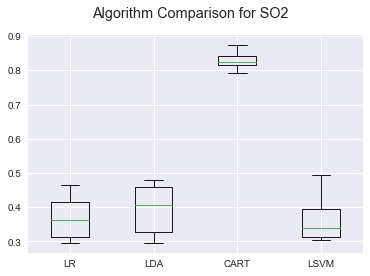

In [229]:

seed = 7
models = []
models.append(('LR', LogisticRegression()))        # Gives Error
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('CART', DecisionTreeRegressor()))  # GIves Error   
models.append(('LSVM', LinearSVC()))



Xs1_train, Xs1_test, ys1_train, ys1_test = train_test_split(X_s, y_so2, test_size=0.33, random_state=42)
Xn1_train, Xn1_test, yn1_train, yn1_test = train_test_split(X_n, y_so2, test_size=0.33, random_state=42)
results = []
names = []
scoring = 'accuracy'

for name, model in models:
    kfold = KFold(n_splits=10, random_state=seed)
    cv_results = cross_val_score(model, Xn1_train, yn1_train.ravel(), cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

    
    
fig = plt.figure()
fig.suptitle('Algorithm Comparison for SO2')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()


In [235]:
tree = DecisionTreeRegressor(max_depth = 7,random_state = 0) # Prevent Over Fitting
tree.fit(Xs_train,ys_train)
print("Accuracy on Training Set: {:.3f}".format(tree.score(Xs1_train,ys1_train)))
print("Accuracy on Test Set: {:.3f}".format(tree.score(Xs1_test,ys1_test)))

Accuracy on Training Set: 0.812
Accuracy on Test Set: 0.505
